In [84]:
from premise import *
import bw2data, bw2calc
import pandas as pd
bw2data.projects.set_current("ei39")

In [201]:
startwith = [
    "electricity production",
    "heat and power"
]

FU = [
    {a: 1} for a in
    bw2data.Database("test8")
    if any(a["name"].startswith(x) for x in startwith) and a["unit"] == "kilowatt hour"
]

print(len(FU))

list_meth = [
    ('IPCC 2021', 'climate change', 'GWP 100a, incl. H'),
    ('IPCC 2021', 'climate change', 'GWP 100a, incl. H and bio CO2'),
    ('selected LCI results', 'resource', 'land occupation'),
    ('EN15804', 'inventory indicators ISO21930', 'use of net fresh water'),
    ('Cumulative Energy Demand (CED)', 'total', 'energy content (HHV)'),
    ('USEtox', 'ecotoxicity', 'total')
]
import bw2calc
bw2data.calculation_setups['multiLCA'] = {'inv': FU, 'ia': list_meth}
myMultiLCA = bw2calc.MultiLCA('multiLCA')

2275


In [202]:
df = pd.DataFrame(columns = [", ".join(i) for i in list_meth],
     data = myMultiLCA.results,
     index=[k["name"] + ", " + k["location"] for i in FU for k in i]
)

In [203]:
df.index = df.index.str.replace("electricity production, ", "")
df.index = df.index.str.replace("heat and power co-generation, ", "CHP,")
df = df.sort_index()

In [205]:
df.columns=["GWP", "GWP + bio", "land", "water", "energy", "tox"]

In [206]:
mapping = pd.read_excel("mapping.xlsx", index_col=0)
mapping=mapping.to_dict("index")

In [207]:
mapping={k: list(v.values())[0] for k, v in mapping.items()}

In [208]:
df["type"]=df.index.map(mapping)

In [196]:
df.loc[]

,GWP,GWP + bio,land,water,energy,tox,type
"Evolutionary Power Reactor (EPR), CH",0.004251,0.004241,0.000728,0.001026,13.024052,0.206373,Nuclear
"Evolutionary Power Reactor (EPR), FR",0.004104,0.004098,0.000694,0.007004,11.171414,0.182701,Nuclear
"Evolutionary Power Reactor (EPR), RER",0.004106,0.004100,0.000694,0.007004,11.171470,0.182734,Nuclear
"Small Modular Reactor (SMR), CH",0.006549,0.006520,0.001155,0.004164,17.977440,0.303364,Nuclear
"at 110 MW concentrating solar power plant, with thermal energy storage, CH",0.004998,0.004949,0.009492,0.000209,0.102194,0.637905,Solar Concentrated


In [191]:
df.loc[df["type"]=="Oil"]

,GWP,GWP + bio,land,water,energy,tox,type
"oil, AR",1.223342,1.222732,0.008365,0.000953,15.768526,1.490425,Oil
"oil, AT",1.217199,1.216727,0.009445,0.001199,15.801267,0.925959,Oil
"oil, AU",1.222640,1.222029,0.008373,0.001554,15.761173,1.525038,Oil
"oil, BA",1.236322,1.235733,0.009444,0.001447,15.801017,1.490901,Oil
"oil, BE",1.222307,1.221840,0.009446,0.001533,15.801313,0.989679,Oil
...,...,...,...,...,...,...,...
"oil, US-WECC",1.222787,1.222172,0.008374,0.001725,15.766238,1.525562,Oil
"oil, ZA",1.336884,1.335803,0.012283,0.002916,14.528077,2.558182,Oil
"oil, aluminium industry, IAI Area, EU27 & EFTA",1.245269,1.244707,0.009455,0.001526,15.801972,1.923446,Oil
"oil, aluminium industry, IAI Area, Gulf Cooperation Council",1.223638,1.223027,0.008368,0.001558,15.769151,1.525419,Oil


In [209]:
df.to_excel("elec.xlsx")

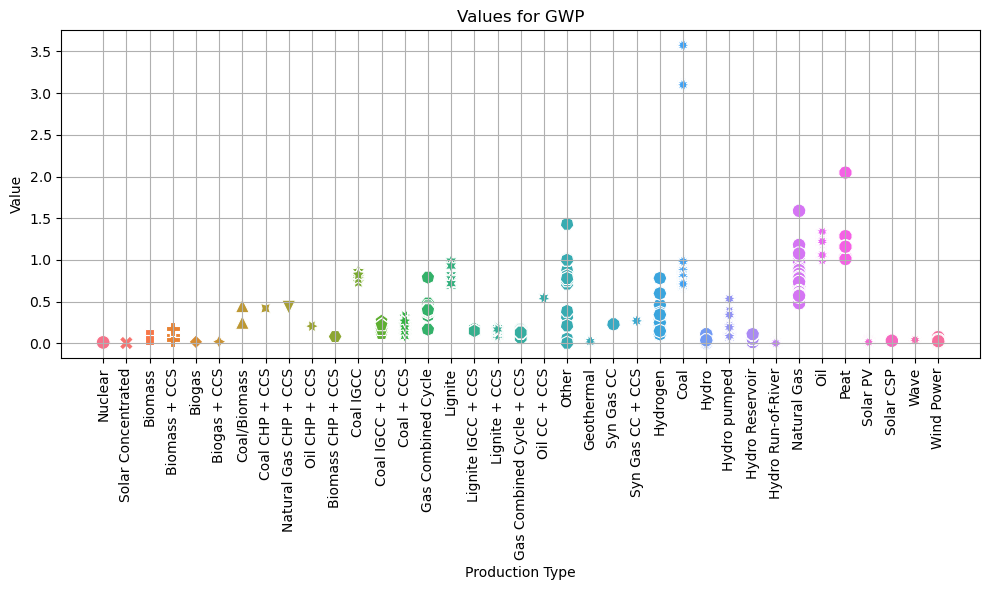

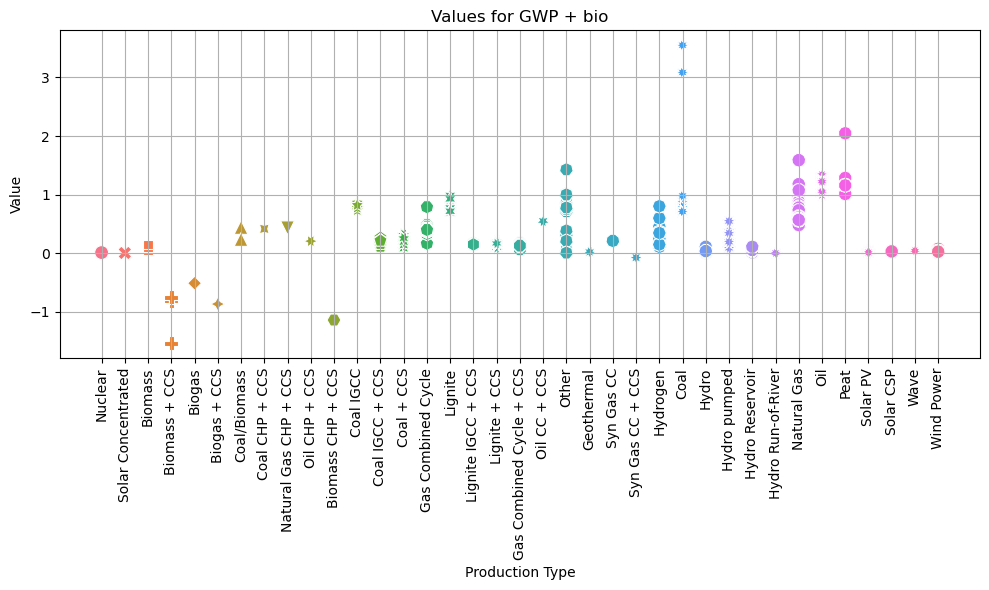

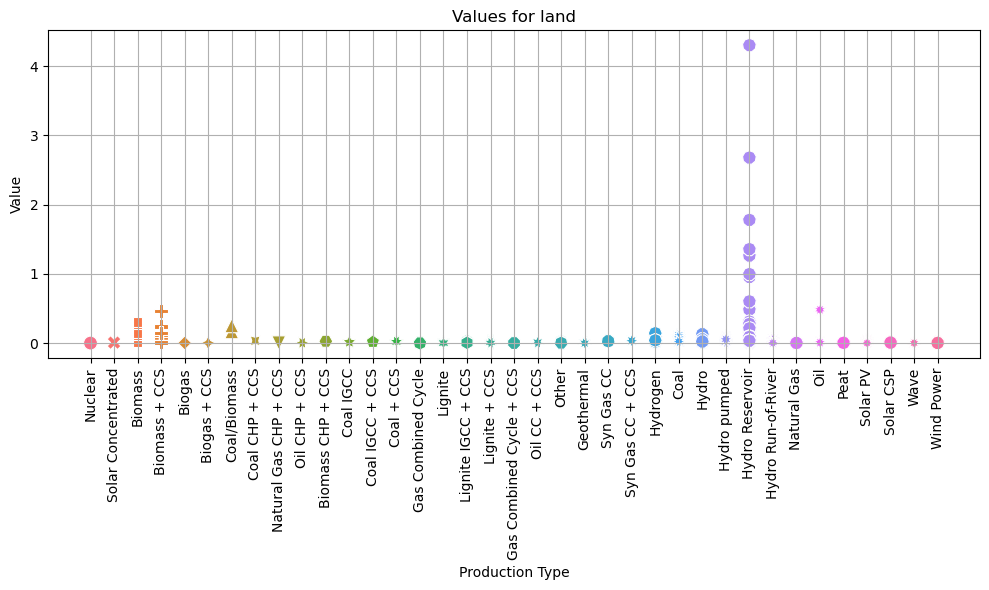

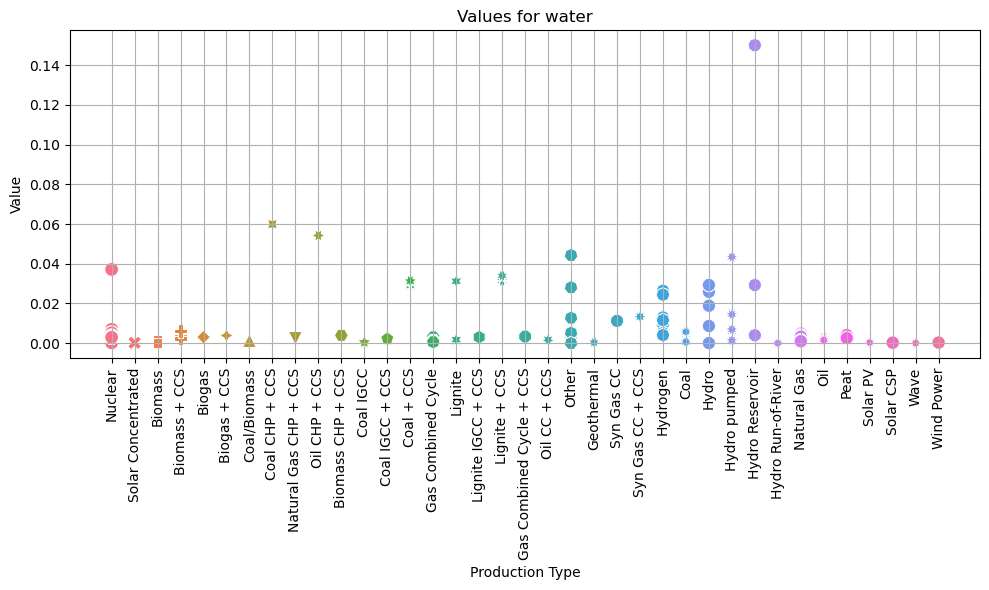

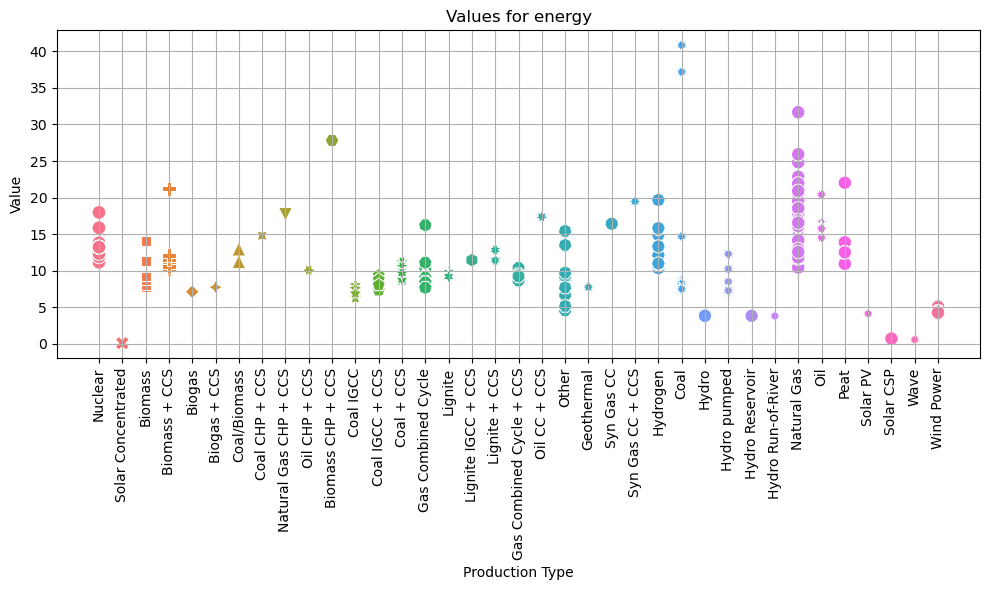

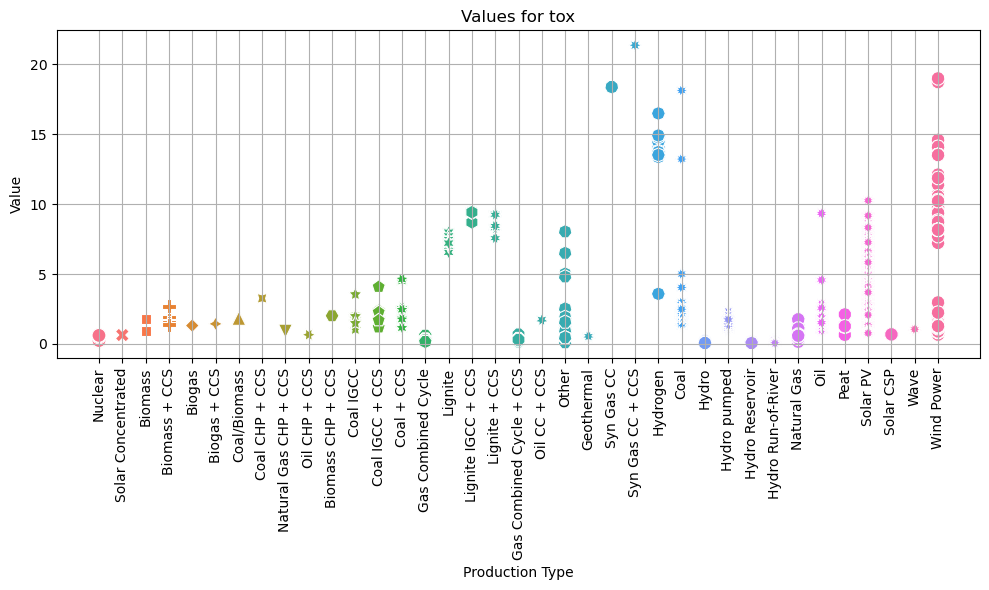

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Impact categories (excluding the first 'Unnamed' and last 'type' columns)
impact_categories = df.columns[0:-1]

# Plotting
for impact_category in impact_categories:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='type', y=impact_category, hue='type', style='type', s=100)
    plt.title(f'Values for {impact_category}')
    plt.ylabel('Value')
    plt.xlabel('Production Type')
    plt.xticks(rotation=90)
    plt.grid()

    if impact_category in ["GWP", "GWP + bio", "land"]:
        plt.ylim(None, None)
    #plt.legend(title='Production Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.legend().remove()
    plt.tight_layout()
    plt.show()


In [88]:
outliers_df_with_deviation.to_excel("outliers.xlsx")